In [1]:
import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import param
import panel as pn
import seaborn as sns

import geoviews as gv
from bokeh.models import PrintfTickFormatter

from panel.interact import interact
from shapely.geometry import shape

pn.extension('tabulator')
pn.extension()

C:\Users\User\anaconda3\Lib\site-packages\geoviews\operation\__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


In [2]:
df = pd.read_csv('NaN_fillup_done_FRIDAY.csv', sep=',')
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK,WE,82.0326,5928585.0
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS,WE,82.9578,384303.0
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL,MENAF,83.3861,9693280.0
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL,WE,82.5802,17750264.0


In [3]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('NaN_fillup_done_FRIDAY.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [4]:
country_to_continent = {
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Iceland': 'Europe',
    'Israel': 'Asia',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Switzerland': 'Europe',
    'Luxembourg': 'Europe',
    'New Zealand': 'Oceania',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Canada': 'North America',
    'Ireland': 'Europe',
    'United States': 'North America',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'Czechia': 'Europe',
    'United Kingdom': 'Europe',
    'Lithuania': 'Europe',
    'France': 'Europe',
    'Slovenia': 'Europe',
    'Costa Rica': 'North America',
    'Romania': 'Europe',
    'Singapore': 'Asia',
    'United Arab Emirates': 'Asia',
    'Taiwan Province of China': 'Asia',
    'Uruguay': 'South America',
    'Slovakia': 'Europe',
    'Saudi Arabia': 'Asia',
    'Estonia': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Kosovo': 'Europe',
    'Chile': 'South America',
    'Mexico': 'North America',
    'Malta': 'Europe',
    'Panama': 'North America',
    'Poland': 'Europe',
    'Nicaragua': 'North America',
    'Latvia': 'Europe',
    'Bahrain': 'Asia',
    'Guatemala': 'North America',
    'Kazakhstan': 'Asia',
    'Serbia': 'Europe',
    'Cyprus': 'Europe',
    'Japan': 'Asia',
    'Croatia': 'Europe',
    'Brazil': 'South America',
    'El Salvador': 'North America',
    'Hungary': 'Europe',
    'Argentina': 'South America',
    'Honduras': 'North America',
    'Uzbekistan': 'Asia',
    'Malaysia': 'Asia',
    'Portugal': 'Europe',
    'South Korea': 'Asia',
    'Greece': 'Europe',
    'Mauritius': 'Africa',
    'Thailand': 'Asia',
    'Mongolia': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Moldova': 'Europe',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Paraguay': 'South America',
    'Montenegro': 'Europe',
    'Jamaica': 'North America',
    'Bolivia': 'South America',
    'Russia': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Colombia': 'South America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Bulgaria': 'Europe',
    'Nepal': 'Asia',
    'Armenia': 'Asia',
    'Tajikistan': 'Asia',
    'Algeria': 'Africa',
    'Hong Kong S.A.R. of China': 'Asia',
    'Albania': 'Europe',
    'Indonesia': 'Asia',
    'South Africa': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'North Macedonia': 'Europe',
    'Venezuela': 'South America',
    'Laos': 'Asia',
    'Georgia': 'Asia',
    'Guinea': 'Africa',
    'Ukraine': 'Europe',
    'Ivory Coast': 'Africa',
    'Gabon': 'Africa',
    'Nigeria': 'Africa',
    'Cameroon': 'Africa',
    'Mozambique': 'Africa',
    'Iraq': 'Asia',
    'State of Palestine': 'Asia',
    'Morocco': 'Africa',
    'Iran': 'Asia',
    'Senegal': 'Africa',
    'Mauritania': 'Africa',
    'Burkina Faso': 'Africa',
    'Namibia': 'Africa',
    'Turkiye': 'Asia',
    'Ghana': 'Africa',
    'Pakistan': 'Asia',
    'Niger': 'Africa',
    'Tunisia': 'Africa',
    'Kenya': 'Africa',
    'Sri Lanka': 'Asia',
    'Uganda': 'Africa',
    'Chad': 'Africa',
    'Cambodia': 'Asia',
    'Benin': 'Africa',
    'Myanmar': 'Asia',
    'Bangladesh': 'Asia',
    'Gambia': 'Africa',
    'Mali': 'Africa',
    'Egypt': 'Africa',
    'Togo': 'Africa',
    'Jordan': 'Asia',
    'Ethiopia': 'Africa',
    'Liberia': 'Africa',
    'India': 'Asia',
    'Madagascar': 'Africa',
    'Zambia': 'Africa',
    'Tanzania': 'Africa',
    'Comoros': 'Africa',
    'Malawi': 'Africa',
    'Botswana': 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'Zimbabwe': 'Africa',
    'Sierra Leone': 'Africa',
    'Lebanon': 'Asia',
    'Afghanistan': 'Asia',
    'Luxembourg*': 'Europe',
    'Guatemala*': 'North America',
    'Kuwait*': 'Asia',
    'Belarus*': 'Europe',
    'Turkmenistan*': 'Asia',
    'North Cyprus*': 'Europe',
    'Libya*': 'Africa',
    'Azerbaijan*': 'Asia',
    'Gambia*': 'Africa',
    'Liberia*': 'Africa',
    'Congo': 'Africa',
    'Niger*': 'Africa',
    'Turkey': 'Asia',
    'Comoros*': 'Africa',
    'Palestinian Territories*': 'Asia',
    'Eswatini, Kingdom of*': 'Africa',
    'Madagascar*': 'Africa',
    'Chad*': 'Africa',
    'Yemen*': 'Asia',
    'Mauritania*': 'Africa',
    'Lesotho*': 'Africa',
    'Botswana*': 'Africa',
    'Rwanda*': 'Africa',
    'xx': 'Unknown',
    'Czech Republic': 'Europe',
    'Kuwait': 'Asia',
    'North Cyprus': 'Europe',
    'Belarus': 'Europe',
    'Libya': 'Africa',
    'Maldives': 'Asia',
    'Azerbaijan': 'Asia',
    'Turkmenistan': 'Asia',
    'Palestinian Territories': 'Asia',
    'Swaziland': 'Africa',
    'Burundi': 'Africa',
    'Yemen': 'Asia',
    'Haiti': 'North America',
    'Lesotho': 'Africa',
    'Rwanda': 'Africa',
    'Trinidad and Tobago': 'North America',
    'Macedonia': 'Europe',
    'Central African Republic': 'Africa',
    'South Sudan': 'Africa',
    'Taiwan': 'Asia',
    'Qatar': 'Asia',
    'Trinidad & Tobago': 'North America',
    'Northern Cyprus': 'Europe',
    'Hong Kong': 'Asia',
    'Bhutan': 'Asia',
    'Somalia': 'Africa',
    'Syria': 'Asia',
    'Belize': 'North America',
    'Sudan': 'Africa',
    'Angola': 'Africa',
    'Hong Kong S.A.R., China': 'Asia',
    'Puerto Rico': 'North America',
    'Suriname': 'South America',
    'Somaliland Region': 'Africa',
    'Oman': 'Asia',
    'Somaliland region': 'Africa',
    'Djibouti': 'Africa',
}

In [5]:
df.loc[:,'Continent'] = df.loc[:,'Country'].map(country_to_continent)
df.drop(columns=['Region'], inplace=True)
df.head(1)

,Year,Country,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,Continent
0,2023,Finland,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0,Europe


In [6]:
from dataprep.clean import clean_country

df = clean_country(df, 'Country', output_format='alpha-3')

df.head()

  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	1359 values cleaned (98.05%)
Result contains 1359 (98.05%) values in the correct format and 27 null values (1.95%)


,Year,Country,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,Continent,Country_clean
0,2023,Finland,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0,Europe,FIN
1,2023,Denmark,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK,WE,82.0326,5928585.0,Europe,DNK
2,2023,Iceland,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS,WE,82.9578,384303.0,Europe,ISL
3,2023,Israel,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL,MENAF,83.3861,9693280.0,Asia,ISR
4,2023,Netherlands,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL,WE,82.5802,17750264.0,Europe,NLD


In [7]:
df.rename(columns={'Country_clean':'iso_a3'}, inplace = True)
#df.drop(columns=['ISO_Code'], inplace=True)
df.head(1)

,Year,Country,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,Continent,iso_a3
0,2023,Finland,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0,Europe,FIN


In [8]:
df.dropna(subset=['Country'], inplace=True)
df.isnull().sum()

Year                            0
Country                         0
Happiness_Rank                  0
Happiness                       0
Explained_by_Trust              1
Explained_by_GDP                0
Explained_by_Freedom            0
Explained_by_Generosity         0
Explained_by_Health             1
Explained_by_Social_support     0
Dystopia_Residual               2
ISO_Code                        0
Region_Code                     0
Life_Expectancy                 9
Total_Population               18
Continent                       0
iso_a3                          0
dtype: int64

In [9]:
idf = df.interactive()

In [10]:
colors = sns.color_palette("Dark2",6)

In [11]:
year_slider_continent = pn.widgets.IntSlider(name='Year slider', start=2015, end=2023, step=1, value=2015)
#year_slider

In [12]:
# Radio buttons for Happiness
axis_happy_continent = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Happiness', 'Happiness_Rank'],
    button_type='light'
)
axis_happy = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Happiness', 'Happiness_Rank'],
    button_type='light'
)
#axis_happy

In [13]:
# Data-Pipeline for Continents

continents = df['Continent'].unique()

happy_continents_median = (
    idf[
        (idf.Year == year_slider_continent) &
        (idf.Continent.isin(continents))
    ]
    .groupby(['Country','Continent', 'Year','Explained_by_GDP'])[axis_happy_continent].median()
    .to_frame()
    .reset_index()
    .sort_values(by=axis_happy_continent, ascending=True)  
    .reset_index(drop=True)
)
#happy_continents_median

In [14]:
happy_continent_median_scatter = happy_continents_median.hvplot.scatter(x=axis_happy_continent, 
                                                                y='Explained_by_GDP', 
                                                                by='Continent',
                                                                title='\nGlobal Happiness Explained by GDP\n',
                                                                alpha=0.75,
                                                                width=600,
                                                                height=400,
                                                                hover_cols='Country',
                                                                color=colors,
                                                                size=130)
#happy_continent_median_scatter # Call scatterplot

In [15]:
#Data-Pipeline for Countries

country_list = list(df['Country'].unique())
country_list.sort()

country_select = pn.widgets.Select(name='Select Country', options=country_list)
year_slider_country = pn.widgets.IntSlider(name='Year slider', start=2015, end=2023, step=1, value=2015)

country_pipeline_1 = (
    idf[(idf['Country']==country_select)&(idf['Year']<= year_slider_country)]
    .groupby(['Year','Explained_by_GDP','Explained_by_Health'])[axis_happy].max()
    #.to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
) 
country_pipeline_2 = (
    idf[(idf['Year']<=year_slider_country)&(idf['Happiness'])]
     .groupby('Year')['Happiness'].median()
)
country_year_pipeline = (country_pipeline_1, country_pipeline_2)

#country_year_pipeline[0]

In [16]:
average_happiness_plot = country_year_pipeline[1].hvplot.line(x='Year',
                                                             y='Happiness',
                                                             line_dash='dashed',
                                                             line_width=1.25,
                                                             line_color='black',
                                                             title="Average Happiness over Time",
                                                             width=500,
                                                             height=300,
                                                             legend=False
                                                             )                                                             


happiness_changes_plot_line = country_year_pipeline[0].hvplot.line(x='Year',
                                                              y=axis_happy,
                                                              line_width=2.5,
                                                              line_color=colors,
                                                              rot=0,
                                                              width=500,
                                                              height=300,
                                                              title="Happiness Change over Time vs. Global Happiness-Median",
                                                              legend=False,
                                                              grid=True,
                                                              hover_cols=['Happiness_Rank','Explained_by_GDP','Country']
                                                            )

happiness_changes_plot_scatter = country_year_pipeline[0].hvplot.scatter(x='Year',
                                                                         y=axis_happy,
                                                                         color=colors,
                                                                         size=20,
                                                                         marker='o')
                                                            


country_stats_test = pn.panel(country_year_pipeline[0].hvplot.table(width=400, title="Data Table")+
                              (happiness_changes_plot_line * happiness_changes_plot_scatter * average_happiness_plot)
                         )

#country_stats_test #Call plot and data table

In [17]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=2015, end=2023, step=1, value=2015)
#year_slider

yaxis_happiness_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Explained_by_Trust', 'Explained_by_Freedom', 'Explained_by_GDP', 'Explained_by_Health', 'Explained_by_Social_support'], 
    button_type='default'
)

happyness_source_bar_pipeline = (
    idf[
        (idf.Year == year_slider) &
        (idf.Continent.isin(continents))
    ]
    .groupby(['Year', 'Continent'])[yaxis_happiness_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Continent')  
    .reset_index(drop=True)
)

happyness_source_bar_plot = happyness_source_bar_pipeline.hvplot.bar(x='Continent', 
                                                                     y=yaxis_happiness_source,
                                                                     title='Happyness source by continent',
                                                                     color='skyblue')
happyness_source_bar_plot 

In [18]:
# Create interactive World Map

shapefile = 'Data/World/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
world_shapes = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
world.columns = ['country', 'iso_a3', 'geometry']
world_shapes.columns = ['country', 'iso_a3', 'geometry']
#Drop row corresponding to 'Antarctica'
world = world.drop(world.index[159])
world_shapes = world.drop(world.index[159])
world.head()

,country,iso_a3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [19]:
df_grouped = df.groupby(['Year','Country'])[['Happiness','Happiness_Rank','Life_Expectancy','iso_a3']].min().reset_index()
df_grouped.head()

,Year,Country,Happiness,Happiness_Rank,Life_Expectancy,iso_a3
0,2015,Afghanistan,3.575,153,62.6587,AFG
1,2015,Albania,4.959,95,78.6441,ALB
2,2015,Algeria,5.605,68,75.6220,DZA
3,2015,Angola,4.033,137,60.6546,AGO
4,2015,Argentina,6.574,30,76.7602,ARG


In [20]:
iso_a3_set_df = set(df['iso_a3'])
iso_a3_set_world = set(world['iso_a3'])

In [21]:
missing_in_df = iso_a3_set_world - iso_a3_set_df
missing_in_df = sorted(missing_in_df)
if missing_in_df:
    print("ISO_A3-Codes, die in df fehlen (keine Happiness-Werte):", missing_in_df)
else:
    print("Alle ISO_A3-Codes in df sind auch in world vorhanden.")

ISO_A3-Codes, die in df fehlen (keine Happiness-Werte): ['ATF', 'BHS', 'BRN', 'CUB', 'CYN', 'ERI', 'FJI', 'FLK', 'GNB', 'GNQ', 'GRL', 'GUY', 'KOS', 'NAM', 'NCL', 'PNG', 'PRK', 'PSX', 'SAH', 'SDS', 'SLB', 'SOL', 'TLS', 'VUT']


In [22]:
missing_in_world = iso_a3_set_df - iso_a3_set_world

if missing_in_world:
    print("ISO_A3-Codes, die in world fehlen (keine Geodaten):", missing_in_world)
else:
    print("Alle ISO_A3-Codes in df2 sind auch in df1 vorhanden.")

ISO_A3-Codes, die in world fehlen (keine Geodaten): {'COM', 'XKX', 'SGP', 'PSE', 'MLT', 'HKG', 'BHR', 'MDV', 'MUS', 'SSD'}


In [23]:
# Comoros, Singapore, Palestine, Maldives, South Sudan, Bahrain, Mauritius, Hong Kong, Malta, Kosovo
# Do we have Happiness Values for these countries?

In [24]:
world=pd.merge(world,df_grouped,left_on=['iso_a3'],right_on=['iso_a3'],how='left')
world.head()

,country,iso_a3,geometry,Year,Country,Happiness,Happiness_Rank,Life_Expectancy
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2015.0,Tanzania,3.781,146.0,64.6507
2,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2016.0,Tanzania,3.666,149.0,65.3862
3,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2017.0,Tanzania,3.349,153.0,65.9987
4,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2018.0,Tanzania,3.303,153.0,66.5346


In [25]:
world.shape

(1298, 8)

The method supplied for Panel to display was declared with `watch=True`, which will cause the method to be called twice for any change in a dependent Parameter. `watch` should be False when Panel is responsible for displaying the result of the method call, while `watch=True` should be reserved for methods that work via side-effects, e.g. by modifying internal state of a class or global state in an application's namespace.


Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
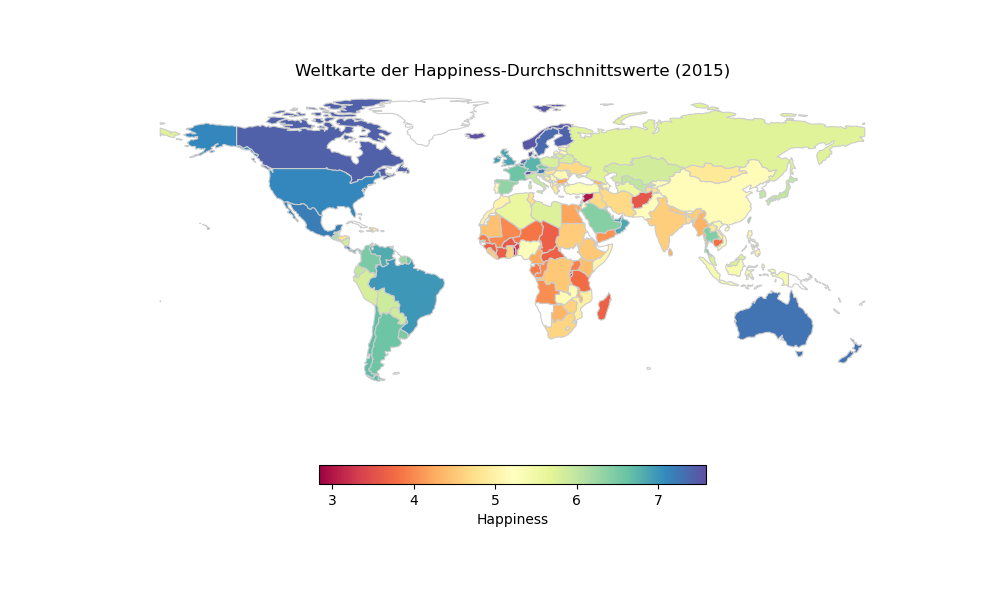

In [41]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2023))
    variable = param.ObjectSelector(default="Happiness", objects=["Happiness", 
                                                                  "Explained_by_Trust",
                                                                  "Explained_by_GDP", 
                                                                  "Explained_by_Freedom",
                                                                  "Explained_by_Generosity",
                                                                  "Explained_by_Health", 
                                                                  "Explained_by_Social_support", 
                                                                  "Life_Expectancy"])

    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()
        
    @param.depends('year','variable', watch=True)    
    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr und der ausgewählten Variable
        filtered_data = self.world_data[(self.world_data["Year"] == self.year)]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(10,6))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'Spectral'
        missing_color = 'white'
        im = merged.plot(column=self.variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={'color': missing_color})

        # Legende hinzufügen und aktualisieren
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged[self.variable].min(), vmax=merged[self.variable].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax,location='bottom', shrink=0.5)
        cbar.set_label(self.variable)  # Setzen Sie den Labeltext der Legende

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der {self.variable}-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()

        return pn.pane.Matplotlib(fig, width=800, height=500)

world_map_app = WorldMapApp(world=world)
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)
variable_selector = pn.widgets.Select(name='Variable', options=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Life_Expectancy"], value="Happiness")

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = year_slider.value
    world_map_app.year = year

def update_variable(event):
    variable = variable_selector.value
    world_map_app.variable = variable

year_slider.param.watch(update_world_map, 'value')
variable_selector.param.watch(update_variable, 'value')

# Verknüpfen Sie den Slider und das Dropdown-Widget mit den entsprechenden Parametern der WorldMapApp
year_slider.param.value = world_map_app.param.year
variable_selector.param.value = world_map_app.param.variable

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane

In [42]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World Happiness 2015 - 2023', 
    sidebar=[pn.pane.JPG('Unbenannt.jpg', sizing_mode='scale_both'),
             pn.pane.Markdown("## The World Happiness Report\n Can be considered to be a significant assessment of worldwide well-being."+
                              "This report has garnered widespread acclaim as governments, institutions, and civil society increasingly incorporate happiness indicators into their policy formulation. Distinguished specialists from diverse disciplines, including economics, psychology, survey analysis, national statistics, health, and public policy, elaborate on how well-being measurements can serve as valuable tools for evaluating a nation's development. The report offers an insightful overview of global happiness in the contemporary world and sheds light on how the emerging field of happiness science clarifies the disparities in happiness, both on an individual and national scale."), 
             pn.pane.Markdown("## Dataset Explained"),
             pn.pane.Markdown("## About this Dashboard")
             ],
    main=[pn.Row(pn.Column(happy_continent_median_scatter),
                 pn.Column(country_stats_test)
                 ),
         pn.Row(pn.Column(yaxis_happiness_source, happyness_source_bar_pipeline.panel(width=800)), 
                 pn.Column(happyness_source_bar_plot.panel(width=600), margin=(0,25))
               ),
         pn.Row(pn.Column(world_map_pane.servable())
               )
               ],
    header_background="#F08080",
    header_color='black',
    theme='default',
    theme_toggle=False,
    )
template.show();

Launching server at http://localhost:60055


In [ ]:
pn.template.FastListTemplate()